# 1. Data Preparation

In [2]:
#dataset - used for LSTM
#data - used for Linear regression and PCA
#the only difference is the date column (whether it's an index or a separate column)

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/Users/tatianataranenko/Desktop/Midterm_Data_Final.csv', sep=",")
data.reset_index(drop=True, inplace=True)


In [5]:
data.head(n = 5)
data1 = data.copy()

In [6]:
data.drop(["VXOCLSx", "ANDENOx", "TWEXMMTH"], axis = 1, inplace=True)

In [7]:
data.shape

(686, 126)

In [8]:
#Adding the shifted log RV SP500 variable to the end
data["RV_SP_t+1"] = data['SP500_Log_RV'].shift(-1)
data.dropna(inplace=True)
data.head(n = 5)


,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,SP500_Log_RV,RV_SP_t+1
0,196001,0.003193,0.004647,0.002784,0.016960,0.026606,0.025916,0.024100,0.029022,0.031235,...,3.149149,3.767826,2.977046,2.066667,22.627107,35.635283,38.192049,17.318598,-9.978618,-9.764658
1,196002,0.001145,0.000919,0.004327,0.014412,0.003696,-0.008937,-0.005684,-0.003439,-0.011455,...,3.185473,3.779477,3.019738,2.066667,22.633744,35.624616,38.210598,17.275018,-9.764658,-10.114079
2,196003,0.001910,0.000918,0.014072,-0.028021,-0.001102,-0.009017,-0.003429,-0.001146,0.001154,...,3.207986,3.836763,3.038539,-2.233333,22.639667,35.638250,38.229134,17.183713,-10.114079,-9.998177
3,196004,0.003426,0.003621,0.015382,0.009836,0.025903,-0.007961,0.002287,0.001146,0.006880,...,3.216955,3.890090,3.043223,-2.233333,22.648015,35.675776,38.260412,17.104581,-9.998177,-10.859174
4,196005,0.002403,0.002448,-0.020417,-0.031588,-0.015047,-0.001143,0.005691,0.006866,0.005698,...,3.216955,3.879021,3.043223,-2.233333,22.657042,35.729302,38.301476,17.081010,-10.859174,-10.684570


In [9]:
#Adding the shifted log RV SP500 variable to the end
data1["RV_SP_t+1"] = data1['SP500_Log_RV'].shift(-1)

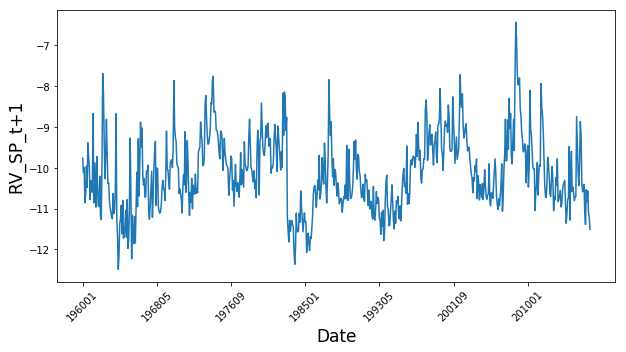

In [143]:
plt.figure(figsize = (10,5))
plt.plot(range(data.shape[0]),(data['RV_SP_t+1']))
plt.xticks(range(0,data.shape[0],100),data['sasdate'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=17)
plt.ylabel('RV_SP_t+1',fontsize=17)
plt.show()

In [109]:
dataset = data.copy()
dataset.set_index(data.columns[0], inplace=True)

In [110]:
dataset.tail(n=5)

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,SP500_Log_RV,RV_SP_t+1
sasdate,,,,,,,,,,,,,,,,,,,,,
201609,0.002853,0.003589,0.003639,0.003114,0.004786,0.000069,0.001273,0.000110,-0.000483,0.004931,...,12.483728,13.045058,12.089006,1.4,38.300130,50.495754,54.103004,32.369398,-10.538240,-10.829038
201610,0.001811,0.001315,0.000803,0.000553,0.004199,0.001966,0.000436,0.000527,-0.002675,0.008883,...,12.489012,13.050408,12.092416,-4.0,38.315093,50.535493,54.114931,32.406935,-10.829038,-10.564833
201611,0.002483,0.003812,0.002111,0.000158,-0.000162,-0.001936,-0.002297,-0.004154,-0.007292,-0.008622,...,12.498691,13.062640,12.096790,6.6,38.327848,50.541085,54.113116,32.434052,-10.564833,-11.082164
201612,0.002188,0.002592,0.002808,0.012265,0.008100,0.008561,0.012210,0.014843,0.016527,0.001581,...,12.506164,13.070282,12.102134,4.4,38.343080,50.532143,54.106759,32.437840,-11.082164,-11.205356
201701,0.003370,0.003202,0.000399,-0.003008,0.011535,0.001054,-0.002950,-0.005381,-0.011129,0.009903,...,12.509672,13.075988,12.104076,0.3,38.355765,50.523348,54.100003,32.433715,-11.205356,-11.510579


In [111]:
dataset.iloc[357:360]

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,SP500_Log_RV,RV_SP_t+1
sasdate,,,,,,,,,,,,,,,,,,,,,
198910,0.004761,0.004897,-0.000668,-0.009701,-0.011113,-0.000651,-0.003064,-0.004632,0.003005,-0.017501,...,9.628676,10.271307,9.371064,-1.9,30.537228,45.656808,48.317505,25.289673,-9.451763,-10.792818
198911,0.000950,0.000251,0.000483,0.008904,0.008706,0.003273,0.003691,0.003553,0.004089,0.006683,...,9.639465,10.288133,9.377784,-3.0,30.571413,45.571616,48.332987,25.323826,-10.792818,-10.795440
198912,0.000753,0.001415,0.008259,0.003300,0.002582,0.006050,0.011925,0.016057,0.015788,0.010174,...,9.652914,10.310210,9.386398,-0.4,30.604560,45.475879,48.343064,25.358897,-10.795440,-9.547384


# 2. Forecasts

## 2.1. LSTM

In [47]:
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers.core import Dense , Activation
from keras.layers.recurrent import LSTM 
from keras.layers import Dropout
from keras.backend import clear_session
from sklearn.metrics import mean_squared_error
import time

Using TensorFlow backend.


Window #0 was done in 5.5272462368011475 seconds
Window #1 was done in 5.555527925491333 seconds
Window #2 was done in 5.696741104125977 seconds
Window #3 was done in 5.134671926498413 seconds
Window #4 was done in 4.778746843338013 seconds
Window #5 was done in 5.254151105880737 seconds
Window #6 was done in 5.205836772918701 seconds
Window #7 was done in 5.6289122104644775 seconds
Window #8 was done in 5.152946949005127 seconds
Window #9 was done in 5.80030369758606 seconds
Window #10 was done in 4.981227874755859 seconds
Window #11 was done in 5.302163362503052 seconds
Window #12 was done in 4.858844995498657 seconds
Window #13 was done in 5.511310815811157 seconds
Window #14 was done in 4.773883819580078 seconds
Window #15 was done in 5.1280858516693115 seconds
Window #16 was done in 4.966835975646973 seconds
Window #17 was done in 5.386647939682007 seconds
Window #18 was done in 4.864495038986206 seconds
Window #19 was done in 5.415521621704102 seconds
Window #20 was done in 4.875

Window #166 was done in 4.977370023727417 seconds
Window #167 was done in 5.517101049423218 seconds
Window #168 was done in 5.1111900806427 seconds
Window #169 was done in 5.466760873794556 seconds
Window #170 was done in 4.929842948913574 seconds
Window #171 was done in 5.075968980789185 seconds
Window #172 was done in 4.638848066329956 seconds
Window #173 was done in 5.1597981452941895 seconds
Window #174 was done in 4.90810227394104 seconds
Window #175 was done in 5.4078450202941895 seconds
Window #176 was done in 4.784722805023193 seconds
Window #177 was done in 5.269343852996826 seconds
Window #178 was done in 4.720571756362915 seconds
Window #179 was done in 5.063822031021118 seconds
Window #180 was done in 4.752562046051025 seconds
Window #181 was done in 5.539410352706909 seconds
Window #182 was done in 5.08471417427063 seconds
Window #183 was done in 5.544086933135986 seconds
Window #184 was done in 4.882569789886475 seconds
Window #185 was done in 5.801459789276123 seconds
Wi

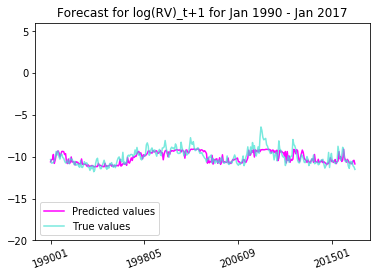

In [49]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_Y = StandardScaler(with_std=False)
pred_NN5 = []
MSE_NN5 = 0

N = 325
for i in range (0,N):
    start_time = time.time()
    window_data = data1.iloc[i:(i+361),1:]
    window_data.dropna(axis='columns', inplace=True)
    
    X_train = window_data.iloc[0:360,1:(len(window_data.columns)-1)]
    X_train = scaler_X.fit_transform(X_train)
    X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
    
    Y_train = window_data.iloc[0:360,[(len(window_data.columns)-1)]]
    Y_train = scaler_Y.fit_transform(Y_train)
    
    X_test = window_data.iloc[[360],1:(len(window_data.columns)-1)]
    X_test = scaler_X.transform(X_test)
    X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))
    
    Y_test = (window_data.iloc[360,(len(window_data.columns)-1)]).reshape(-1,1)
    
    # design network
    clear_session()
    model = Sequential()
    #Creating a layer of LSTM memory units allows to specify the number of memory units within the layer
    model.add(LSTM(64,return_sequences=True,activation='tanh',input_shape = (X_train.shape[1], (X_train.shape[2]))))
    model.add(Dropout(0.5))
    model.add(LSTM(32,activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='tanh'))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    history = model.fit(X_train, Y_train, epochs=50, batch_size=30, verbose=0, shuffle=False)
    
    Y_pred = scaler_Y.inverse_transform(model.predict(X_test))[0]
    
    MSE_NN5 += (Y_pred-Y_test)**2
    pred_NN5.append(Y_pred)
    end_time = time.time()
    print("Window #{0} was done in {1} seconds".format(i, end_time-start_time))

MSE_NN5 =  MSE_NN5 / N
pred_NN5 = np.concatenate(pred_NN5, axis=0 )
plt.plot(pred_NN5, color='magenta') 
plt.plot(data.iloc[360:,126].reset_index(drop=True), color='turquoise', alpha=0.7)
plt.ylim(-20,6)
plt.title('Forecast for log(RV)_t+1 for Jan 1990 - Jan 2017')
plt.legend(('Predicted values','True values'),loc='lower left')
labels = data['sasdate'].iloc[360:]
plt.xticks(range(0,labels.shape[0],100),labels.loc[::100],rotation=20)
plt.savefig('/Users/tatianataranenko/Desktop/580/NN_final.jpeg')
print('MSE for LSTM Model: {}'.format(MSE_NN5[0]))

## 2.2. PCA

Number of components chosen for window 0 is 7
Number of components chosen for window 1 is 7
Number of components chosen for window 2 is 7
Number of components chosen for window 3 is 7
Number of components chosen for window 4 is 7
Number of components chosen for window 5 is 7
Number of components chosen for window 6 is 7
Number of components chosen for window 7 is 7
Number of components chosen for window 8 is 7
Number of components chosen for window 9 is 7
Number of components chosen for window 10 is 7
Number of components chosen for window 11 is 7
Number of components chosen for window 12 is 7
Number of components chosen for window 13 is 7
Number of components chosen for window 14 is 7
Number of components chosen for window 15 is 7
Number of components chosen for window 16 is 7
Number of components chosen for window 17 is 7
Number of components chosen for window 18 is 7
Number of components chosen for window 19 is 7
Number of components chosen for window 20 is 7
Number of components ch

Number of components chosen for window 174 is 8
Number of components chosen for window 175 is 8
Number of components chosen for window 176 is 8
Number of components chosen for window 177 is 8
Number of components chosen for window 178 is 8
Number of components chosen for window 179 is 8
Number of components chosen for window 180 is 8
Number of components chosen for window 181 is 8
Number of components chosen for window 182 is 8
Number of components chosen for window 183 is 8
Number of components chosen for window 184 is 8
Number of components chosen for window 185 is 8
Number of components chosen for window 186 is 8
Number of components chosen for window 187 is 8
Number of components chosen for window 188 is 9
Number of components chosen for window 189 is 9
Number of components chosen for window 190 is 9
Number of components chosen for window 191 is 9
Number of components chosen for window 192 is 9
Number of components chosen for window 193 is 9
Number of components chosen for window 1

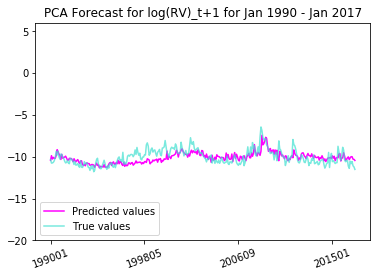

In [77]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
scaler_X = StandardScaler()
scaler_Y = StandardScaler(with_std=False)
pred_PCA2 = np.zeros(325)
variance2 = np.zeros(325)
MSE_PCA2 = 0

#check first 20 principal components for the amount of variance that they predict

for i in range (0,325):
    for k in range (1,20):
        window_data = data1.iloc[i:(i+361),1:]
        window_data.dropna(axis='columns', inplace=True)

        X_train = window_data.iloc[0:360,1:(len(window_data.columns)-1)]
        X_train = scaler_X.fit_transform(X_train)

        Y_train = window_data.iloc[0:360,[(len(window_data.columns)-1)]]
        Y_train = scaler_Y.fit_transform(Y_train)

        X_test = window_data.iloc[[360],1:(len(window_data.columns)-1)]
        X_test = scaler_X.transform(X_test)

        Y_test = (window_data.iloc[360,(len(window_data.columns)-1)])

        pca =  PCA(svd_solver='auto', n_components=k)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

        var = np.sum(pca.explained_variance_ratio_)
        variance2[i] = var

        if (var <0.667):
            pred_PCA2[i] = 0
            variance2[i] = 0
        else:
            break

    reg2 = LinearRegression()
    reg2.fit(X_train, Y_train)
    Y_pred = scaler_Y.inverse_transform(reg2.predict(X_test))[0]
    MSE_PCA2 += (Y_pred-Y_test)**2
    pred_PCA2[i] = Y_pred
    print("Number of components chosen for window {} is {}".format(i,k))
        
    
MSE_PCA2 =  MSE_PCA2 / 326
plt.plot(pred_PCA2, color='magenta') 
labels = data['sasdate'].iloc[360:]
plt.xticks(range(0,labels.shape[0],100),labels.loc[::100],rotation=20)
plt.title("PCA Forecast for log(RV)_t+1 for Jan 1990 - Jan 2017")
plt.plot(data.iloc[360:,126].reset_index(drop=True), color='turquoise', alpha=0.7)
plt.ylim(-20,6)
plt.legend(('Predicted values','True values'),loc='lower left')
print('MSE for PCA: {}'.format(MSE_PCA2[0]))
print("Number of principal components chosen for model is: 8")
plt.savefig('/Users/tatianataranenko/Desktop/580/PCA2.jpeg')

seq = np.linspace(1, 325, num=325)
var = {"Window":seq, "Variance explained": variance2}
var_res = pd.DataFrame(data = var)
print(var_res)

MSE for PCA: 0.5375270141295848


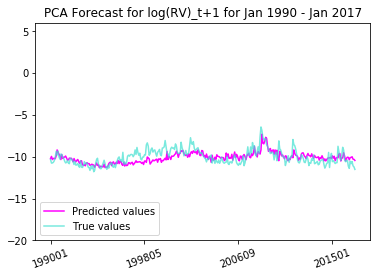

In [80]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
scaler_X = StandardScaler()
scaler_Y = StandardScaler(with_std=False)
pred_PCA2 = []
variance2 = []
MSE_PCA2 = 0

#check first 20 principal components for the amount of variance that they predict
for i in range (0,325):
    window_data = data1.iloc[i:(i+361),1:]
    window_data.dropna(axis='columns', inplace=True)

    X_train = window_data.iloc[0:360,1:(len(window_data.columns)-1)]
    X_train = scaler_X.fit_transform(X_train)

    Y_train = window_data.iloc[0:360,[(len(window_data.columns)-1)]]
    Y_train = scaler_Y.fit_transform(Y_train)

    X_test = window_data.iloc[[360],1:(len(window_data.columns)-1)]
    X_test = scaler_X.transform(X_test)

    Y_test = (window_data.iloc[360,(len(window_data.columns)-1)])

    pca =  PCA(svd_solver='auto', n_components=8)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    variance2.append(np.sum(pca.explained_variance_ratio_))

    reg2 = LinearRegression()
    reg2.fit(X_train, Y_train)

    Y_pred = scaler_Y.inverse_transform(reg2.predict(X_test))[0]

    MSE_PCA2 += (Y_pred-Y_test)**2
    pred_PCA2.append(Y_pred)
        
MSE_PCA2 =  MSE_PCA2 / 326
pred_PCA2 = np.concatenate(pred_PCA2, axis=0 )
plt.plot(pred_PCA2, color='magenta') 
labels = data['sasdate'].iloc[360:]
plt.xticks(range(0,labels.shape[0],100),labels.loc[::100],rotation=20)
plt.title("PCA Forecast for log(RV)_t+1 for Jan 1990 - Jan 2017")
plt.plot(data.iloc[360:,126].reset_index(drop=True), color='turquoise', alpha=0.7)
plt.ylim(-20,6)
plt.legend(('Predicted values','True values'),loc='lower left')
print('MSE for PCA: {}'.format(MSE_PCA2[0]))
plt.savefig('/Users/tatianataranenko/Desktop/580/PCA2.jpeg')

## 2.3. AR(p)

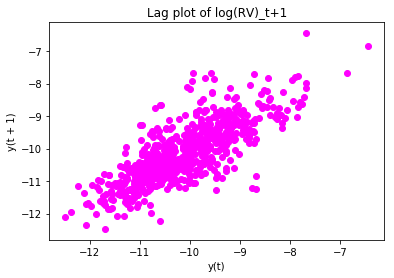

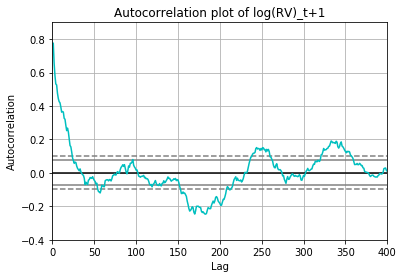

In [37]:
import warnings
warnings.filterwarnings("ignore")

from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
import matplotlib.colors


series = dataset['RV_SP_t+1']

plt.figure(0)
lag_plot(series, c = "magenta")
plt.title("Lag plot of log(RV)_t+1")
plt.savefig('/Users/tatianataranenko/Desktop/580/Lag_plot.jpeg')
pyplot.show()


plt.figure(1)
autocorrelation_plot(series, c='c')
plt.axis([0,400, -0.4, 0.9])
plt.title('Autocorrelation plot of log(RV)_t+1')
plt.savefig('/Users/tatianataranenko/Desktop/580/Autocorrelation_plot.jpeg')
pyplot.show()


### Selection of lags based on bic criteria

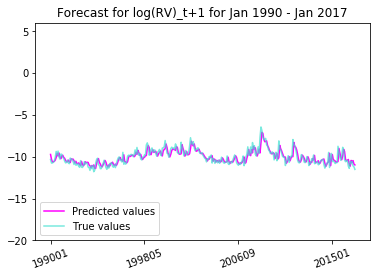

MSE for AR: 0.2633210264344741


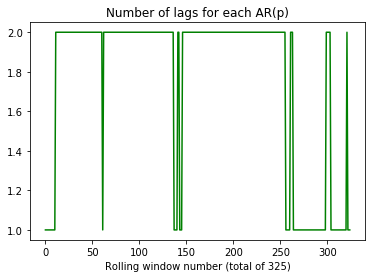

In [115]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

pred_AR = []
lags = []
MSE_AR = 0

for i in range (0,325):
    Y_train = series[i:(i+360)].reset_index(drop=True)
    Y_test = series[360:].reset_index(drop=True)[i]
    
    model = AR(Y_train)
    model_fit = model.fit(ic = 'bic')
    lags.append(model_fit.k_ar)
    Y_pred = model_fit.predict(start=len(Y_train), end=len(Y_train), dynamic=False)

    MSE_AR += (Y_pred-Y_test)**2
    pred_AR.append(Y_pred)

MSE_AR =  MSE_AR/ 326
pred_AR = np.concatenate(pred_AR, axis=0 )


plt.figure(0)
plt.plot(pred_AR, color='magenta') 
plt.plot(data.iloc[360:,126].reset_index(drop=True), color='turquoise', alpha=0.7)

labels = data['sasdate'].iloc[360:]
plt.xticks(range(0,labels.shape[0],100),labels.loc[::100],rotation=20)
plt.title("Forecast for log(RV)_t+1 for Jan 1990 - Jan 2017")

plt.ylim(-20,6)
plt.legend(('Predicted values','True values'),loc='lower left')
plt.savefig('/Users/tatianataranenko/Desktop/580/AR_bic.jpeg')
plt.show()

print('MSE for AR: {}'.format(MSE_AR.values[0]))

plt.figure(1)
plt.plot(lags, color='green')
plt.title("Number of lags for each AR(p)")
plt.xlabel("Rolling window number (total of 325)")
plt.savefig('/Users/tatianataranenko/Desktop/580/AR_bic_lags.jpeg')
plt.show()

### Selection of lags based on aic criteria

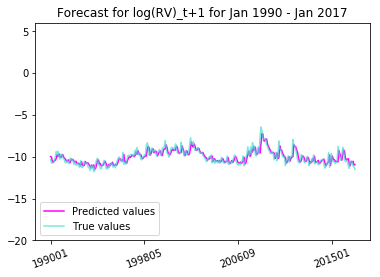

MSE for AR: 0.25863708084783826


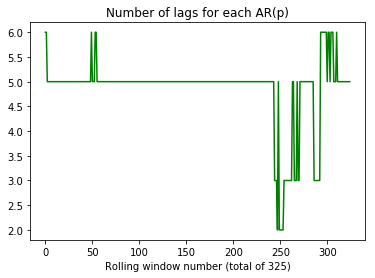

In [114]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

pred_AR1 = []
lags1 = []
MSE_AR1 = 0

for i in range (0,325):
    Y_train = series[i:(i+360)].reset_index(drop=True)
    Y_test = series[360:].reset_index(drop=True)[i]
    
    model = AR(Y_train)
    model_fit = model.fit(ic = 'aic')
    lags1.append(model_fit.k_ar)
    Y_pred = model_fit.predict(start=len(Y_train), end=len(Y_train), dynamic=False)

    MSE_AR1 += (Y_pred-Y_test)**2
    pred_AR1.append(Y_pred)

MSE_AR1 =  MSE_AR1/ 326
pred_AR1 = np.concatenate(pred_AR1, axis=0 )

plt.figure(0)
plt.plot(pred_AR1, color='magenta') 
plt.plot(data.iloc[360:,126].reset_index(drop=True), color='turquoise', alpha=0.7)

labels = data['sasdate'].iloc[360:]
plt.xticks(range(0,labels.shape[0],100),labels.loc[::100],rotation=20)
plt.title("Forecast for log(RV)_t+1 for Jan 1990 - Jan 2017")


plt.ylim(-20,6)
plt.legend(('Predicted values','True values'),loc='lower left')
plt.savefig('/Users/tatianataranenko/Desktop/580/AR_aic.jpeg')
plt.show()
print('MSE for AR: {}'.format(MSE_AR1.values[0]))

plt.figure(1)
plt.plot(lags1, color='green')
plt.title("Number of lags for each AR(p)")
plt.xlabel("Rolling window number (total of 325)")
plt.savefig('/Users/tatianataranenko/Desktop/580/AR_aic_lags.jpeg')
plt.show()

### 2.4 OLS

MSE for OLS: 0.4819792434211943


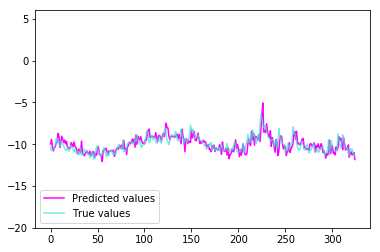

In [36]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler_X = StandardScaler()
scaler_Y = StandardScaler(with_std=False)
pred_OLS = []
MSE_LS = 0

for i in range (0,325):
    X_train = data.iloc[i:(i+360),1:(len(data.columns)-1)]
    X_train = scaler_X.fit_transform(X_train)
    
    Y_train = data .iloc[i:(i+360),[126]]
    Y_train = scaler_Y.fit_transform(Y_train)
    
    X_test = data.iloc[[i+360],1:(len(data.columns)-1)]
    X_test = scaler_X.transform(X_test)
    
    Y_test = data.iloc[360:,126].reset_index(drop=True)[i]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    Y_pred = scaler_Y.inverse_transform(model.predict(X_test))[0]
    
    MSE_LS += (Y_pred-Y_test)**2
    pred_OLS.append(Y_pred)

MSE_LS =  MSE_LS / 326
pred_OLS = np.concatenate(pred_OLS, axis=0 )
plt.plot(pred_OLS, color='magenta') 
plt.plot(data.iloc[360:,126].reset_index(drop=True), color='turquoise', alpha=0.7)
plt.ylim(-20,6)
plt.legend(('Predicted values','True values'),loc='lower left')

print('MSE for OLS: {}'.format(MSE_LS[0]))

## Results

In [100]:
res = {"LSTM(2)": pred_NN2, 'AR(aic)': pred_AR1, "PCA":pred_PCA}
results = pd.DataFrame(data = res)
results.set_index(data['sasdate'].iloc[360:])
results.to_csv(r'Desktop/results.csv')

In [224]:
res1 = {"LSTM": pred_NN5, "PCA":pred_PCA2, "true":data.iloc[360:,126].reset_index(drop=True)}
results1 = pd.DataFrame(data = res1)
results1.set_index(data['sasdate'].iloc[360:])
results1.to_csv(r'Desktop/results1.csv')
results1

,LSTM,PCA,true
0,-10.943052,-10.215914,-10.327141
1,-10.479918,-9.956343,-10.757267
2,-9.901593,-10.332594,-10.739628
3,-10.080760,-10.193122,-10.660653
4,-10.905730,-10.199279,-10.467806
5,-10.123132,-10.227338,-10.055313
6,-9.947180,-9.895434,-9.356751
7,-9.348319,-9.179790,-9.794540
8,-9.379327,-9.427777,-9.319514
9,-9.529223,-9.704253,-10.017591
